## Estadística Aplicada

Primer examen parcial

Karla Mariana Ley Acero 2076201

Grupo 42

In [236]:
#Primero exportamos las librerías generales

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1.-Carga la base de datos de películas raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/peliculas.csvque    tiene    información    sobre    películas, incluyendo el título(title), género (category ) y duración en minutos(length).

In [237]:
peliculas = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/peliculas.csv')

In [238]:
# Ver Dataframe para ver si se cargó
peliculas.head()

,title,description,release_year,rental_rate,length,rating,special_features,category
0,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary
1,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,4.99,48,G,"Trailers,Deleted Scenes",Horror
2,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary
3,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror
4,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,2.99,130,G,Deleted Scenes,Family


    a) Cuantas  películas  hay,  cuantos  géneros,  y  cuanto  duran  en  promedio  las películas

In [316]:
# Segunda forma
# Contar cuantos titulos hay = numero de peliculas

print(f'El total de películas es de: ', peliculas['title'].count())

El total de películas es de:  1000


In [318]:

print(f'Las peliculas duran en promedio:', peliculas['length'].mean()) 


Las peliculas duran en promedio: 115.272


In [319]:
#Primera forma
categorias = pd.DataFrame(peliculas.groupby('category'))
print('La cantidad de generos es de: ', categorias[0].count())

La cantidad de generos es de:  16


In [320]:
#Segunda forma
num_categorias = peliculas.groupby('category')
print('La cantidad de generos es de:', len(num_categorias))

La cantidad de generos es de: 16


    b) crea  un  dataframe  llamado películas_dormir  con  las  películas  que  tienen  una duración superior a 2 horas y sean documentales

In [242]:
#Primera forma
peliculas_dormir = peliculas[(peliculas['length']>=120) & (peliculas['category']== 'Documentary')]
#mostrar DataFrame
peliculas_dormir.head()

,title,description,release_year,rental_rate,length,rating,special_features,category
39,Army Flintstones,A Boring Saga of a Database Administrator And ...,2006,0.99,148,R,"Trailers,Commentaries",Documentary
57,Beach Heartbreakers,A Fateful Display of a Womanizer And a Mad Sci...,2006,2.99,122,G,"Deleted Scenes,Behind the Scenes",Documentary
128,Cause Date,A Taut Tale of a Explorer And a Pastry Chef wh...,2006,2.99,179,R,"Commentaries,Deleted Scenes,Behind the Scenes",Documentary
141,Chicken Hellfighters,A Emotional Drama of a Dog And a Explorer who ...,2006,0.99,122,PG,"Trailers,Commentaries,Deleted Scenes,Behind th...",Documentary
155,Clerks Angels,A Thrilling Display of a Sumo Wrestler And a G...,2006,4.99,164,G,Commentaries,Documentary


In [243]:
 # Segunda forma

peliculas_dormir = peliculas.query("length >= 120 and category == 'Documentary'")
peliculas_dormir.head()

,title,description,release_year,rental_rate,length,rating,special_features,category
39,Army Flintstones,A Boring Saga of a Database Administrator And ...,2006,0.99,148,R,"Trailers,Commentaries",Documentary
57,Beach Heartbreakers,A Fateful Display of a Womanizer And a Mad Sci...,2006,2.99,122,G,"Deleted Scenes,Behind the Scenes",Documentary
128,Cause Date,A Taut Tale of a Explorer And a Pastry Chef wh...,2006,2.99,179,R,"Commentaries,Deleted Scenes,Behind the Scenes",Documentary
141,Chicken Hellfighters,A Emotional Drama of a Dog And a Explorer who ...,2006,0.99,122,PG,"Trailers,Commentaries,Deleted Scenes,Behind th...",Documentary
155,Clerks Angels,A Thrilling Display of a Sumo Wrestler And a G...,2006,4.99,164,G,Commentaries,Documentary


    c)Contar cuántas películas de cada género existen

In [244]:
peliculas.value_counts('category')

category
Foreign        73
Sports         73
Family         69
Documentary    68
Animation      66
Action         64
New            63
Drama          61
Games          61
Sci-Fi         61
Children       60
Comedy         58
Classics       57
Horror         56
Travel         56
Music          51
Name: count, dtype: int64

    d)Calcular la duración promedio de las películas de cada género.

In [245]:
peliculas.groupby('category')['length'].mean().round(2)

category
Action         111.61
Animation      111.02
Children       109.80
Classics       111.67
Comedy         115.83
Documentary    108.75
Drama          119.89
Family         114.78
Foreign        121.70
Games          127.84
Horror         112.48
Music          113.65
New            111.13
Sci-Fi         108.20
Sports         127.51
Travel         113.38
Name: length, dtype: float64

    e) Crear una nueva columna que indique si una película es "Corta" (duración menor a 1.5 horas), "Normal" (entre 1.5 y 2.5 horas) o "Larga" (mayor a 2.5 horas).

In [246]:
condiciones = [peliculas['length'] < 90, 
               peliculas['length'] >=90, 
               peliculas['length'] > 150]

valores = ['Short', 'Normal', 'Long']

peliculas['clasification'] = np.select(condiciones, valores, default = 'NaN')

In [247]:
peliculas

,title,description,release_year,rental_rate,length,rating,special_features,category,clasification
0,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,0.99,86,PG,"Deleted Scenes,Behind the Scenes",Documentary,Short
1,Ace Goldfinger,A Astounding Epistle of a Database Administrat...,2006,4.99,48,G,"Trailers,Deleted Scenes",Horror,Short
2,Adaptation Holes,A Astounding Reflection of a Lumberjack And a ...,2006,2.99,50,NC-17,"Trailers,Deleted Scenes",Documentary,Short
3,Affair Prejudice,A Fanciful Documentary of a Frisbee And a Lumb...,2006,2.99,117,G,"Commentaries,Behind the Scenes",Horror,Normal
4,African Egg,A Fast-Paced Documentary of a Pastry Chef And ...,2006,2.99,130,G,Deleted Scenes,Family,Normal
...,...,...,...,...,...,...,...,...,...
995,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,0.99,183,G,"Trailers,Behind the Scenes",Documentary,Normal
996,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,0.99,179,NC-17,"Trailers,Behind the Scenes",Music,Normal
997,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,0.99,105,NC-17,Deleted Scenes,Horror,Normal
998,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,2.99,101,R,"Trailers,Deleted Scenes",Children,Normal


2.-Sabemos que en el caso de México, esta formado por estados, y cada estado esta formado por municipios. La base de datos población_Asgard raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/poblacion_Asgard.csvcontiene   los   datos   de   un   país   llamado Asgard, formado por estados y estos a su vez por municipios. Para cada municipio se reporta su población.

In [248]:
# Primero leer base de datos

poblacion_Asgard = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/poblacion_Asgard.csv')

In [249]:
poblacion_Asgard

,País,Estado,Municipio,Población
0,Asgard,Pandora,Reino Tierra,377896
1,Asgard,Alderaan,Fuente Dorada,49984
2,Asgard,Genosha,El Carmen,303918
3,Asgard,Naboo,Omashu,265712
4,Asgard,Mordor,Don Bosco,121151
...,...,...,...,...
85,Asgard,Gotham,Mar violeta,44585
86,Asgard,Mandalore,Mar amarillo,372369
87,Asgard,Mustafar,Mar Azul,65044
88,Asgard,Atlantis,Mar amarillo,961061


    a)Ordena la base alfabéticamente por estado y por municipio

In [250]:
poblacion_Asgard.sort_values(by= ['Estado', 'Municipio'])

,País,Estado,Municipio,Población
16,Asgard,Alderaan,Ciudad Jedi,130312
1,Asgard,Alderaan,Fuente Dorada,49984
31,Asgard,Alderaan,Luz azul,914910
76,Asgard,Alderaan,Madero,774290
46,Asgard,Alderaan,San Isidro,159338
...,...,...,...,...
8,Asgard,Yaven,El Bosque,649663
83,Asgard,Yaven,Green Flag,380989
68,Asgard,Yaven,Santa María,111687
53,Asgard,Yaven,Villa Wendy,646914


    b) Cuantos  estados  hay,  cuantos  municipios  hay  en  cada  estado  y  cuantos municipios hay en total.

In [251]:
#Primero se clasifican por estados 
num_estados = poblacion_Asgard.groupby('Estado')
#Se imprime el total de estados
print(f'El total de estados es de:', len(num_estados))

El total de estados es de: 15


In [252]:
Total_municipios = pd.DataFrame(poblacion_Asgard.groupby('Estado')['Municipio'].count())
Total_municipios

,Municipio
Estado,
Alderaan,6
Atlantis,6
Endor,6
Genosha,6
Gotham,6
Mandalore,6
Mordor,6
Mustafar,6
Naboo,6


In [253]:
print(f'El total de municipios es de: ', poblacion_Asgard['Municipio'].count())

El total de municipios es de:  90


    c) Cuanta población tiene el país en total y cuanta población tiene cada estado

In [254]:
print(f'La población total del país es de:', poblacion_Asgard['Población'].sum())

La población total del país es de: 43114719


In [255]:
poblacion_Asgard.groupby('Estado')['Población'].sum()

Estado
Alderaan     2283452
Atlantis     3779656
Endor        2427956
Genosha      2871584
Gotham       3204304
Mandalore    2044164
Mordor       3627119
Mustafar     2183880
Naboo        1602111
Narnia       2961407
Pandora      2959272
Sokovia      4722224
Tatooine     2770055
Wakanda      2905562
Yaven        2771973
Name: Población, dtype: int64

    d) Calcula la mediana de la población de los municipios, y clasifícalos, aquellos por arriba de la mediana deben llamarse “muy poblados” y aquellos debajo de la mediana “poco poblados”

In [256]:
# Calcular la mediana total
mediana_total = poblacion_Asgard['Población'].mean()

print(f'La mediana total de la población es de: ', mediana_total)


La mediana total de la población es de:  479052.43333333335


In [257]:
poblacion_Asgard['Clasificación'] = np.where(poblacion_Asgard['Población']> mediana_total, 'Muy poblado', 'Poco poblado')
poblacion_Asgard

,País,Estado,Municipio,Población,Clasificación
0,Asgard,Pandora,Reino Tierra,377896,Poco poblado
1,Asgard,Alderaan,Fuente Dorada,49984,Poco poblado
2,Asgard,Genosha,El Carmen,303918,Poco poblado
3,Asgard,Naboo,Omashu,265712,Poco poblado
4,Asgard,Mordor,Don Bosco,121151,Poco poblado
...,...,...,...,...,...
85,Asgard,Gotham,Mar violeta,44585,Poco poblado
86,Asgard,Mandalore,Mar amarillo,372369,Poco poblado
87,Asgard,Mustafar,Mar Azul,65044,Poco poblado
88,Asgard,Atlantis,Mar amarillo,961061,Muy poblado


    e)Encuentra  los  5  municipios  mas  poblados  y  los  cinco  municipios  menos poblados del país

In [270]:
poblacion_Asgard.sort_values('Población', ascending = False).head()

,País,Estado,Municipio,Población,Clasificación
34,Asgard,Mordor,Madripur,998079,Muy poblado
27,Asgard,Mustafar,Villa Norte,997107,Muy poblado
6,Asgard,Sokovia,La Unión,986067,Muy poblado
74,Asgard,Narnia,Gral Escobedo,974548,Muy poblado
79,Asgard,Mordor,Yellow town,974324,Muy poblado


In [271]:
poblacion_Asgard.sort_values('Población').head()

,País,Estado,Municipio,Población,Clasificación
17,Asgard,Genosha,Ciudad Jedi,13666,Poco poblado
14,Asgard,Narnia,Luz roja,14986,Poco poblado
39,Asgard,Endor,Villa rosa,25538,Poco poblado
26,Asgard,Mandalore,Shelbyville,31535,Poco poblado
85,Asgard,Gotham,Mar violeta,44585,Poco poblado


    f) El municipio más poblado de cada estado

In [315]:
municipio_poblado = poblacion_Asgard.groupby('Estado')['Población'].idxmax()
poblacion_Asgard.loc[municipio_poblado]

,País,Estado,Municipio,Población,Clasificación
31,Asgard,Alderaan,Luz azul,914910,Muy poblado
88,Asgard,Atlantis,Mar amarillo,961061,Muy poblado
69,Asgard,Endor,Santa María,875371,Muy poblado
32,Asgard,Genosha,Villa Lannister,822654,Muy poblado
55,Asgard,Gotham,Playa Verde,918710,Muy poblado
71,Asgard,Mandalore,San Pedro,736716,Muy poblado
34,Asgard,Mordor,Madripur,998079,Muy poblado
27,Asgard,Mustafar,Villa Norte,997107,Muy poblado
33,Asgard,Naboo,Luz azul,602661,Muy poblado
74,Asgard,Narnia,Gral Escobedo,974548,Muy poblado


3.-Genera un grafico de barras de:

    a)Los 15 municipios más poblados de Asgard

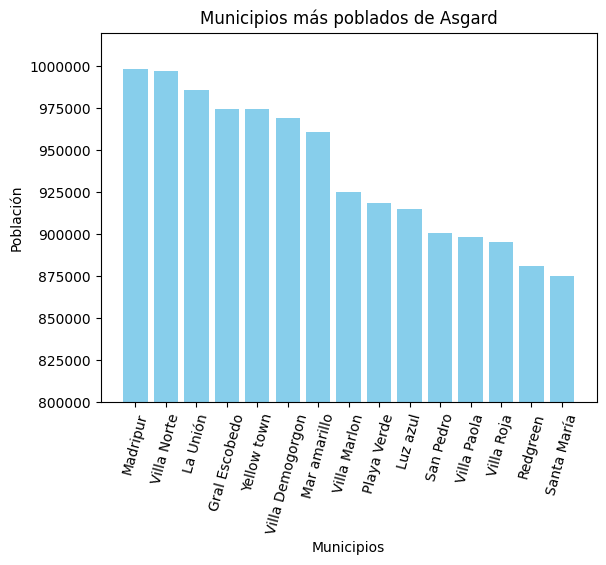

In [351]:
municipios_15 = poblacion_Asgard.sort_values('Población', ascending = False).head(15)
municipios_15

plt.bar(municipios_15['Municipio'], municipios_15['Población'], color= 'skyblue')
plt.title('Municipios más poblados de Asgard')
plt.xlabel('Municipios')
plt.ylabel('Población')
plt.xticks(rotation=75)
plt.ylim (800000, 1020000)
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

    b)Cuantas peliculas hay de cada género

In [348]:
pelis_genero = pd.DataFrame(peliculas.value_counts('category'))
pelis_genero



,count
category,
Foreign,73
Sports,73
Family,69
Documentary,68
Animation,66
Action,64
New,63
Drama,61
Games,61


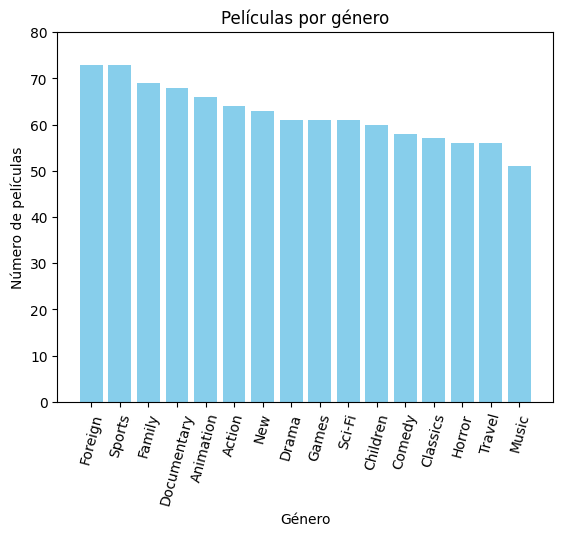

In [352]:
plt.bar(pelis_genero.index, pelis_genero['count'], color= 'skyblue')
plt.title('Películas por género')
plt.xlabel('Género')
plt.ylabel('Número de películas')
plt.xticks(rotation=75)
plt.ylim (0, 80)
plt.show()